# Importing Libraries 

In [17]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# Importing Dataset

In [20]:
data = pd.read_csv('data.csv', delimiter=';')
drop_out_df = pd.DataFrame(data)
drop_out_df.sample(5)
drop_out_df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# Data Cleaning

In [90]:
for col in drop_out_df.columns:
    drop_out_df[col].fillna(drop_out_df[col].mean(), inplace=True)

# Data Transformation

### Encode Graduate and Enrolled as 0 while Dropout as 1
#### Since we are concerned with drop out rate, we can categorize enrolled and graduate as "not dropout"

In [26]:
drop_out_df['Target'] = drop_out_df['Target'].map({
    'Graduate': 0,  # Keep category 0 as 0
    'Enrolled': 0,  # Group category 1 with 0
    'Dropout': 1   # Keep category 2 as a separate class (or merge with another class if needed)
})
drop_out_df.sample(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
489,1,1,3,9500,1,1,128.0,1,38,38,...,0,8,8,7,13.542857,0,13.9,-0.3,0.79,0
2821,1,18,5,9085,1,1,121.0,1,5,3,...,0,5,5,0,0.000000,0,12.7,3.7,-1.70,1
3942,1,17,3,9238,1,1,141.0,1,3,3,...,0,6,12,4,11.000000,0,12.7,3.7,-1.70,0
1840,1,10,1,9773,1,1,151.0,22,38,37,...,0,6,0,0,0.000000,0,9.4,-0.8,-3.12,1
1904,1,1,1,9773,1,1,121.0,1,19,1,...,0,6,7,6,11.666667,0,11.1,0.6,2.02,0


# Checking for Skewness in Data

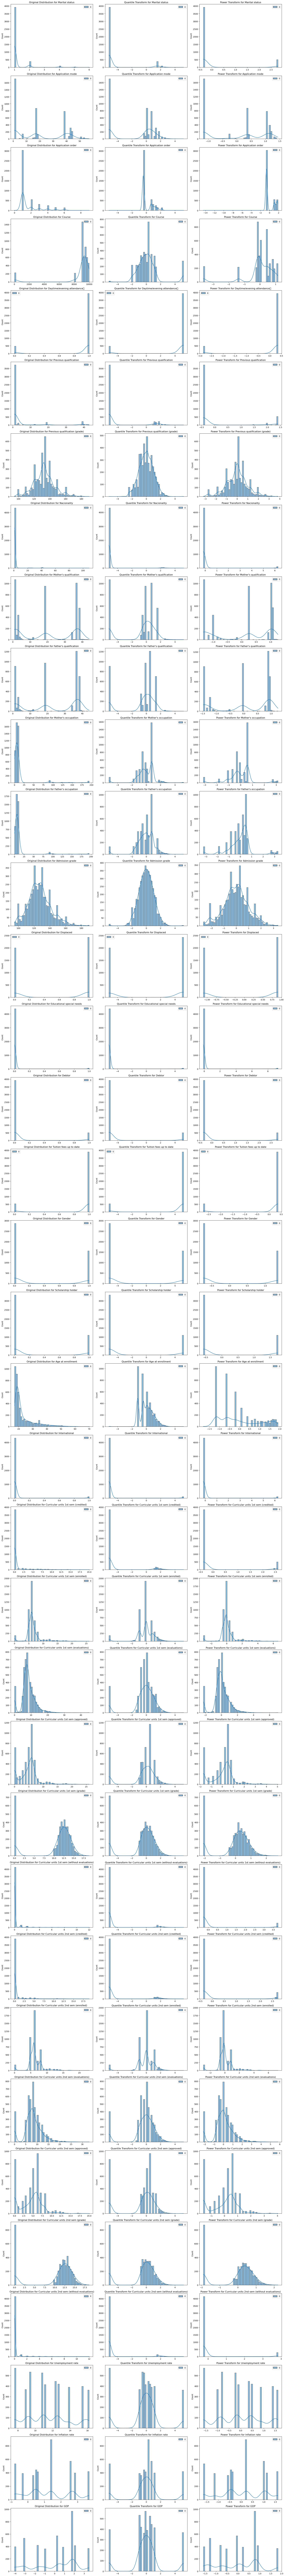

In [57]:
cols1 = drop_out_df.iloc[:, :-1].columns

def test_transformers(columns, df):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    
    num_features = len(columns)
    num_plots_per_feature = 3  # Original, Quantile, and Power transformations
    num_total_plots = num_features * num_plots_per_feature
    
    # Determine the number of rows and columns for the subplot grid
    num_rows = (num_total_plots + 2) // 3  # Add extra row if not perfectly divisible
    num_cols = 3
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D
    
    for j, i in enumerate(columns):
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        
        # Original Distribution
        sns.histplot(array, bins=50, kde=True, ax=axes[j * num_plots_per_feature])
        axes[j * num_plots_per_feature].set_title(f"Original Distribution for {i}")
        
        # Quantile Transformation
        sns.histplot(x, bins=50, kde=True, ax=axes[j * num_plots_per_feature + 1])
        axes[j * num_plots_per_feature + 1].set_title(f"Quantile Transform for {i}")
        
        # Power Transformation
        sns.histplot(y, bins=50, kde=True, ax=axes[j * num_plots_per_feature + 2])
        axes[j * num_plots_per_feature + 2].set_title(f"Power Transform for {i}")

    # Hide any unused subplots
    for k in range(num_total_plots, len(axes)):
        axes[k].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and column names
test_transformers(cols1, drop_out_df.iloc[:, :-1])

#### Quatile transformation performs better that power transformation in transforming the data to a normal distributed data

In [61]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
transformed_df = drop_out_df.copy()
transformed_df[transformed_df.iloc[:, :-1].columns] = qt.fit_transform(drop_out_df.iloc[:, :-1])

## Correlation Analysis

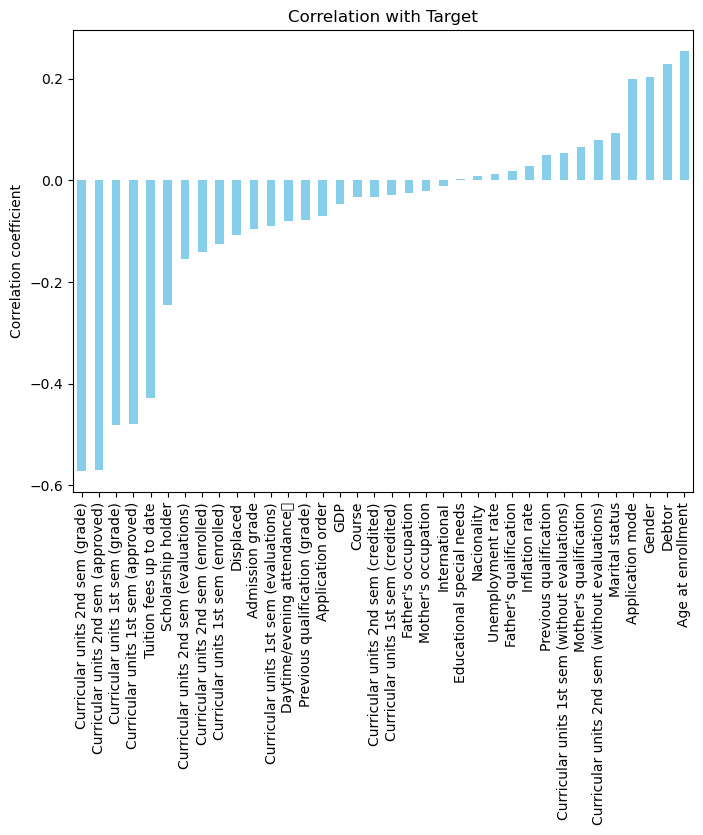

In [64]:
# Correlation of all features with the 'Target' column
correlation_with_target = drop_out_df.corr()['Target'].sort_values()

# Bar plot of the correlations
plt.figure(figsize=(8, 6))
correlation_with_target.drop('Target').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target')
plt.ylabel('Correlation coefficient')
plt.show()
#chart showed that curricular grades for both semester and tuition fees have a strong correlation with the Target

# Hypothesis Testing

### T-test for admission grade and dropout status

In [71]:
from scipy.stats import ttest_ind

grades_dropout = drop_out_df[drop_out_df['Target'] == 1]['Admission grade']
grades_no_dropout = drop_out_df[drop_out_df['Target'] == 0]['Admission grade']

t_stat, p_value = ttest_ind(grades_dropout, grades_no_dropout, equal_var=False)

print(f"T-test for Admission Grades:\nT-statistic: {t_stat}\nP-value: {p_value}")


T-test for Admission Grades:
T-statistic: -6.237124913250986
P-value: 5.181457220403254e-10


***The very low p-value indicates that the difference in dropout rates between students with higher and lower admission grades is significant.
The negative t-statistic suggests that students with higher admission grades are less likely to drop out(Higher admission grades are indeed correlated with a lower likelihood of dropping out.).***

### Chi-Square Test for Financial Aid and Dropout Status

In [79]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(drop_out_df['Scholarship holder'], drop_out_df['Target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test for Financial Aid:\nChi2-statistic: {chi2_stat}\nP-value: {p_value}\nDegrees of Freedom: {dof}")


Chi-Square Test for Financial Aid:
Chi2-statistic: 265.10369150465624
P-value: 1.324567089306277e-59
Degrees of Freedom: 1


***The extremely low p-value indicates a highly significant correlation between scholarship holders and dropout rates.
The high Chi-Square statistic confirms that the difference in dropout rates between students who receive financial aid and those who do not is very unlikely to be due to chance(There is a significant association between receiving financial aid and dropout rates, suggesting that students receiving financial aid are less likely to drop out.).***

### Chi-Square Test for Socio-Economic Status and Dropout Status

In [99]:
socio_economic_features = ["Father's qualification",
                          "Mother's qualification",
                        "Mother's occupation",
                        "Father's occupation"]

for feature in socio_economic_features:
    dropout = drop_out_df[drop_out_df['Target'] == 1][feature]
    no_dropout = drop_out_df[drop_out_df['Target'] == 0][feature]
    t_stat, p_value = ttest_ind(dropout, no_dropout)
    print(f"T-test for {feature}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}\n")

T-test for Father's qualification:
T-statistic: 1.2167541252238032
P-value: 0.22376271576300544

T-test for Mother's qualification:
T-statistic: 4.328721575187275
P-value: 1.5329337667577095e-05

T-test for Mother's occupation:
T-statistic: -1.4632627864788899
P-value: 0.14346655973142297

T-test for Father's occupation:
T-statistic: -1.6137503470023449
P-value: 0.10665293963943168



***Father's qualification, mother's occupation, and father's occupation do not show significant differences in dropout rates based on their p-values. This suggests that these features might not have a strong impact on dropout rates.***

In [102]:
drop_out_df.to_csv('Cleaned_Transformed_Dataset.csv', index=False)

In [104]:
from nbconvert import PDFExporter
import nbformat

# Load the notebook
with open('Data_Preprocessing_and_Analysis.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

# Convert to PDF
pdf_exporter = PDFExporter()
pdf_data, resources = pdf_exporter.from_notebook_node(nb)
with open('Data_Preprocessing_Report.pdf', 'wb') as f:
    f.write(pdf_data)


PandocMissing: Pandoc wasn't found.
Please check that pandoc is installed:
https://pandoc.org/installing.html